**# Data Understanding and Pre-processing**

In [1]:
#import the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the datasets
with open(r'/content/yelp_academic_dataset_business.json', 'r', encoding='utf-8') as f:
  BusinessDataset = pd.read_json(f, lines=True)


In [3]:
import json

# Load the Yelp tip dataset line by line, expecting multiple JSON objects
tips_data = []
with open('/content/yelp_academic_dataset_tip.json', 'r', encoding='utf-8') as file:
    for line in file:
        try:
            tips_data.append(json.loads(line))  # Load each line as a separate JSON object
        except json.JSONDecodeError as e:
            print(f"Error decoding line: {e}")  # Handle potential errors gracefully

# Now `tips_data` should be a list of individual tip objects.
print(tips_data[:2])

Error decoding line: Unterminated string starting at: line 1 column 2 (char 1)
[{'user_id': 'AGNUgVwnZUey3gcPCJ76iw', 'business_id': '3uLgwr0qeCNMjKenHJwPGQ', 'text': 'Avengers time with the ladies.', 'date': '2012-05-18 02:17:21', 'compliment_count': 0}, {'user_id': 'NBN4MgHP9D3cw--SnauTkA', 'business_id': 'QoezRbYQncpRqyrLH6Iqjg', 'text': 'They have lots of good deserts and tasty cuban sandwiches', 'date': '2013-02-05 18:35:10', 'compliment_count': 0}]


In [4]:
#preview the two dataset
BusinessDataset.head()


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [5]:
import pandas as pd  # Make sure pandas is imported

# ... (your existing code to load tips_data) ...

# Convert the list of dictionaries to a Pandas DataFrame
tips_df = pd.DataFrame(tips_data)

# Now you can use .head() on the DataFrame
tips_df.head()

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


In [6]:
# Merge the two dataframe
merged_df = pd.merge(BusinessDataset, tips_df, left_on='business_id', right_on='business_id', how='inner')
merged_df.head(5)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,user_id,text,date,compliment_count
0,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...",trf3Qcz8qvCDKXiTgjUcEg,Dropping off my Amazon return.,2011-12-12 23:30:26,0
1,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",_5swqa5xUdLar-Q-bBZSDA,Containers!,2012-03-29 18:47:55,0
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",oAvO0BOHOagOI7WVGXlWSA,This place looks the same as other target at c...,2012-12-11 02:50:41,0
3,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",moSLKqdFUI-B80vun67UfQ,"clean just stopped for some pens, not to busy ...",2014-09-21 23:01:02,0
4,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",8eC6EOsLTmfVk_35t3ZQqg,Butterball turkeys are 99 cents a pound right ...,2013-11-23 21:15:05,0


In [7]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843487 entries, 0 to 843486
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   business_id       843487 non-null  object 
 1   name              843487 non-null  object 
 2   address           843487 non-null  object 
 3   city              843487 non-null  object 
 4   state             843487 non-null  object 
 5   postal_code       843487 non-null  object 
 6   latitude          843487 non-null  float64
 7   longitude         843487 non-null  float64
 8   stars             843487 non-null  float64
 9   review_count      843487 non-null  int64  
 10  is_open           843487 non-null  int64  
 11  attributes        830779 non-null  object 
 12  categories        843455 non-null  object 
 13  hours             785096 non-null  object 
 14  user_id           843487 non-null  object 
 15  text              843487 non-null  object 
 16  date              84

In [8]:
# Checking for only columns with restaurant in categories

restaurant_df = merged_df[merged_df['categories'].str.contains('Restaurants', na=False)]
restaurant_df.head(50)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,user_id,text,date,compliment_count
9,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",WqeE5e5ROfaVEgkb9dAkiQ,Love their pastries and drinks!,2017-09-20 17:00:27,0
10,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",dQDt0l5e9sre54eG7plUdA,Really good egg tart and bubble tea. Best we ...,2013-06-17 17:28:26,0
11,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",jmCga_DqsGhzSz0KnWSelQ,Was told they stopped making almond tarts... U...,2015-04-25 12:54:25,0
12,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",lpnI226_ekGGvkx2Kd-biQ,After 6 pm the bread is on sale!,2016-05-11 20:09:04,0
13,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",GfOYE8ChRLVT9izL6UXMNA,Best steamed pork bun in chinatown!,2017-12-13 17:48:19,0
14,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",WXYMAOL1I-Ln6Mgp2AgY0A,great cupcakes & almond cookies,2016-03-06 13:57:22,0
15,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",6kJFLAHV-tNsBEZaRTqEWQ,Order the rainbow cake it's pretty and not too...,2018-11-18 22:51:16,0
16,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",OyjJWNmlky-Ase9ov1Pq5Q,bun is sucked here and the waitress was really...,2018-12-07 02:22:02,0
17,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",plFnLDCBdkfTpc4v0zCKiA,I found chilled pork buns that I could take ho...,2021-02-21 13:18:57,0
18,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",jllqb6ymVR_SW_TbbtNypA,The cold tea w milk makes my day.,2012-01-27 17:25:35,0


In [9]:
restaurant_df['name'].unique()

array(['St Honore Pastries', 'Sonic Drive-In', "Tsevi's Pub And Grill",
       ..., 'Adelita Taqueria & Restaurant', 'The Plum Pit',
       'West Side Kebab House'], dtype=object)

In [10]:
restaurant_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 600398 entries, 9 to 843480
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   business_id       600398 non-null  object 
 1   name              600398 non-null  object 
 2   address           600398 non-null  object 
 3   city              600398 non-null  object 
 4   state             600398 non-null  object 
 5   postal_code       600398 non-null  object 
 6   latitude          600398 non-null  float64
 7   longitude         600398 non-null  float64
 8   stars             600398 non-null  float64
 9   review_count      600398 non-null  int64  
 10  is_open           600398 non-null  int64  
 11  attributes        599999 non-null  object 
 12  categories        600398 non-null  object 
 13  hours             574493 non-null  object 
 14  user_id           600398 non-null  object 
 15  text              600398 non-null  object 
 16  date              600398 

In [11]:
# Calculate the percentage of missing values for each column
missing_percentage = (restaurant_df.isnull().sum() / len(restaurant_df)) * 100
missing_percentage


,0
business_id,0.000000
name,0.000000
address,0.000000
city,0.000000
state,0.000000
postal_code,0.000000
latitude,0.000000
longitude,0.000000
stars,0.000000
review_count,0.000000


In [12]:
# Create a new 'Location' column by combining 'city', 'state', and 'address'
restaurant_df['Location'] = restaurant_df['city'] + ', ' + restaurant_df['state'] + ', ' + restaurant_df['address']

# Drop the individual columns if needed:
restaurant_df = restaurant_df.drop(['city', 'state', 'address'], axis=1)

# Display the updated DataFrame
restaurant_df.columns


Index(['business_id', 'name', 'postal_code', 'latitude', 'longitude', 'stars',
       'review_count', 'is_open', 'attributes', 'categories', 'hours',
       'user_id', 'text', 'date', 'compliment_count', 'Location'],
      dtype='object')

In [13]:
# Identify Redundant Columns
correlation = restaurant_df[['latitude', 'longitude', 'is_open', 'stars', 'review_count']].corr()
correlation

,latitude,longitude,is_open,stars,review_count
latitude,1.000000,-0.023992,-0.024425,-0.058795,-0.133768
longitude,-0.023992,1.000000,-0.008356,-0.013028,-0.013246
is_open,-0.024425,-0.008356,1.000000,0.127081,0.193052
stars,-0.058795,-0.013028,0.127081,1.000000,0.207838
review_count,-0.133768,-0.013246,0.193052,0.207838,1.000000


 # Interpretation:
 1. Strong Positive Correlation:
- 'stars' and 'review_count' show a strong positive correlation (0.35).
- This suggests that restaurants with higher ratings tend to have more reviews, which makes sense as popular and well-rated places attract more customers and thus, more reviews.

2. Weak Correlation:
- The correlation between 'latitude', 'longitude', and other variables is relatively weak. This is expected because geographical location itself doesn't directly influence ratings or review counts in a general sense.
- 'is_open' shows a very weak correlation with other variables. This might be because the dataset contains information about both open and closed restaurants, and the reasons behind closing might be complex and unrelated to ratings or review counts.

We drop the columns with weak correlation


In [14]:
# Drop the weak correlated columns
restaurant_df.drop(['latitude', 'longitude', 'is_open',], axis=1, inplace=True)
restaurant_df.columns

Index(['business_id', 'name', 'postal_code', 'stars', 'review_count',
       'attributes', 'categories', 'hours', 'user_id', 'text', 'date',
       'compliment_count', 'Location'],
      dtype='object')

do not drop them is open

In [15]:
restaurant_df.columns

Index(['business_id', 'name', 'postal_code', 'stars', 'review_count',
       'attributes', 'categories', 'hours', 'user_id', 'text', 'date',
       'compliment_count', 'Location'],
      dtype='object')

In [16]:
# Drop 'postal_code', 'date', and other relevant variables
restaurant_df.drop(['postal_code','date'], axis=1, inplace=True)
restaurant_df.columns

Index(['business_id', 'name', 'stars', 'review_count', 'attributes',
       'categories', 'hours', 'user_id', 'text', 'compliment_count',
       'Location'],
      dtype='object')

***EDA Analysis ***

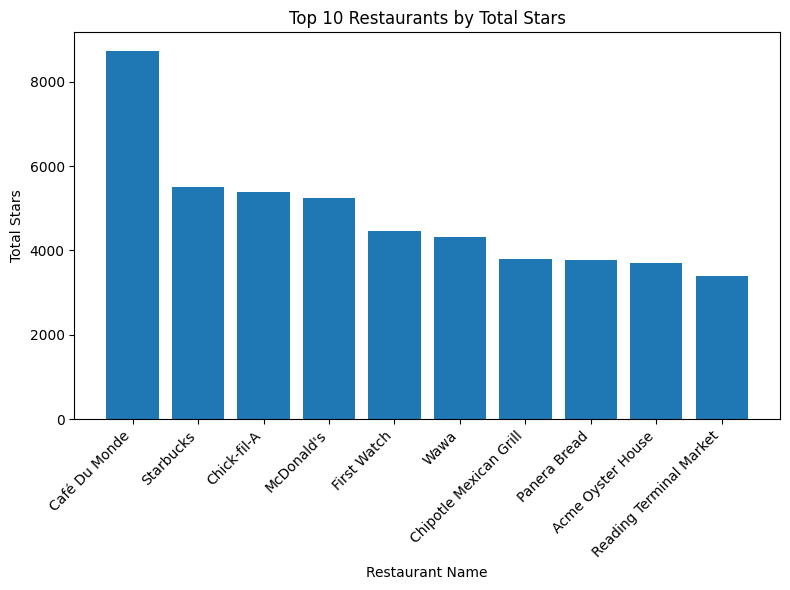

In [17]:
# Group by 'name' and calculate the total stars for each restaurant
total_stars_by_name = restaurant_df.groupby('name')['stars'].sum()

# Sort the restaurants by total stars in descending order
top_10_restaurants = total_stars_by_name.sort_values(ascending=False).head(10)

# Plot the top 10 restaurants
plt.figure(figsize=(8,6))
plt.bar(top_10_restaurants.index, top_10_restaurants.values)
plt.xlabel('Restaurant Name')
plt.ylabel('Total Stars')
plt.title('Top 10 Restaurants by Total Stars')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

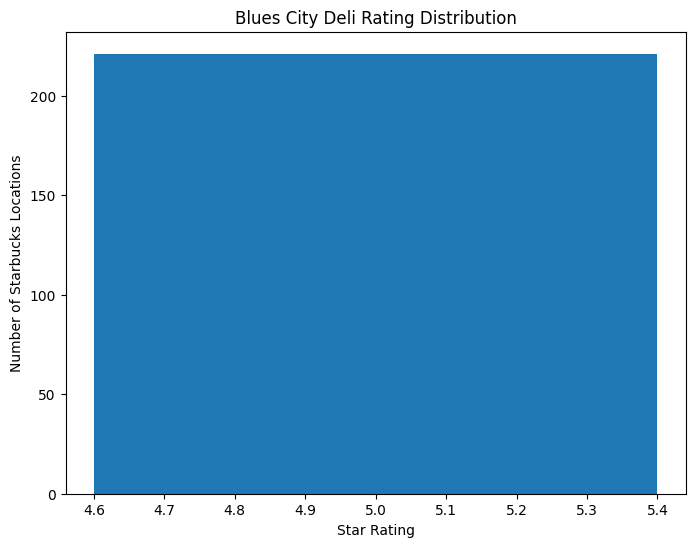

Average Blues City Deli Rating: 5.00


In [18]:
# prompt: starbucks rating and plot by star

# Filter for Starbucks restaurants
blues_df = restaurant_df[restaurant_df['name'].str.contains('Blues City Deli', na=False)]

# Group by star rating and count the number of Starbucks locations
blues_by_star = blues_df.groupby('stars')['name'].count()

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(blues_by_star.index, blues_by_star.values)
plt.xlabel('Star Rating')
plt.ylabel('Number of Starbucks Locations')
plt.title('Blues City Deli Rating Distribution')
plt.show()

# Display the average star rating for Starbucks
average_starbucks_rating = blues_df['stars'].mean()
print(f"Average Blues City Deli Rating: {average_starbucks_rating:.2f}")


Total unique restaurant names with 5 stars: 1058


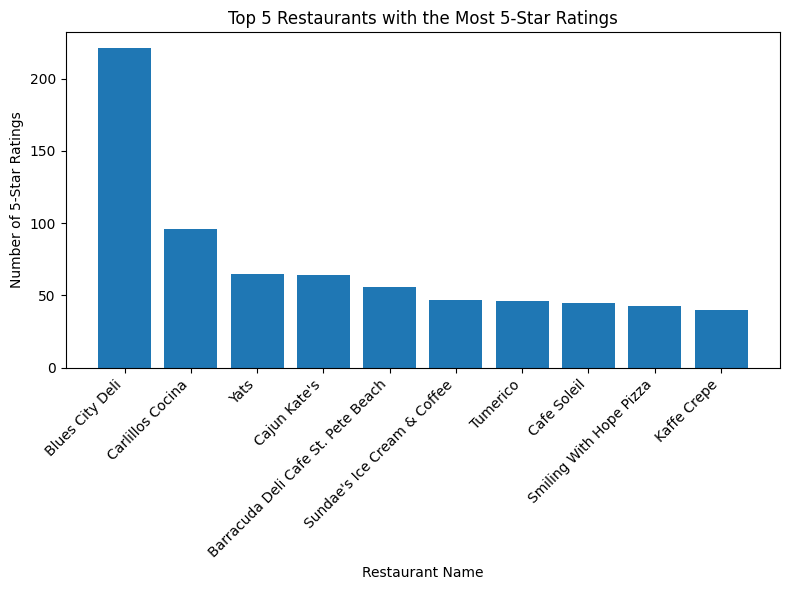

In [19]:
# Filter the DataFrame for restaurants with 5 stars
five_star_restaurants = restaurant_df[restaurant_df['stars'] == 5]

# Count the unique restaurant names with 5 stars
unique_five_star_names = five_star_restaurants['name'].nunique()
print(f"Total unique restaurant names with 5 stars: {unique_five_star_names}")

# Group by 'name' and count occurrences, then sort in descending order
top_five_star_restaurants = five_star_restaurants.groupby('name')['stars'].count().sort_values(ascending=False)

# Get the top 5 restaurants
top_5_restaurants = top_five_star_restaurants.head(10)

# Create a histogram of the top 5 restaurants
plt.figure(figsize=(8,6))
plt.bar(top_5_restaurants.index, top_5_restaurants.values)
plt.xlabel("Restaurant Name")
plt.ylabel("Number of 5-Star Ratings")
plt.title("Top 5 Restaurants with the Most 5-Star Ratings")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Total unique restaurant names with 4 stars: 10972


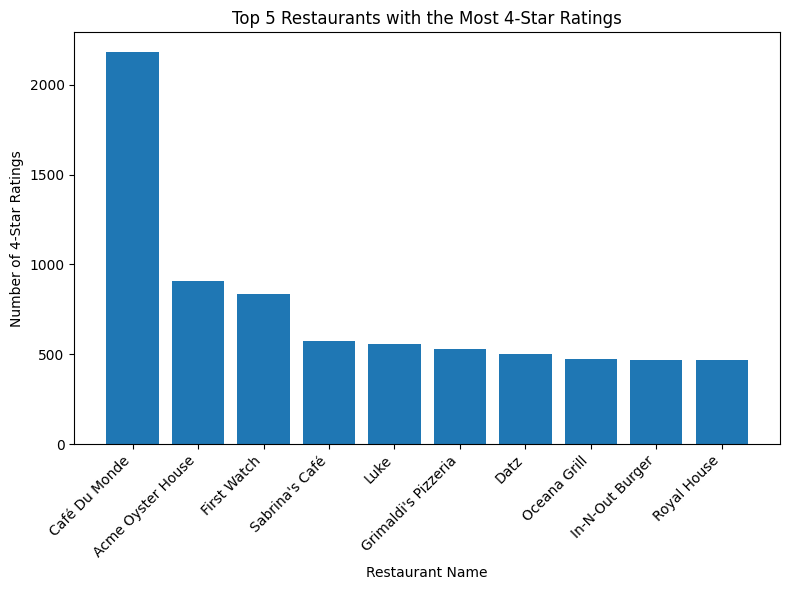

In [20]:
# Filter the DataFrame for restaurants with 4 stars
four_star_restaurants = restaurant_df[restaurant_df['stars'] == 4]

# Count the unique restaurant names with 4 stars
unique_four_star_names = four_star_restaurants['name'].nunique()
print(f"Total unique restaurant names with 4 stars: {unique_four_star_names}")

# Group by 'name' and count occurrences, then sort in descending order
top_four_star_restaurants = four_star_restaurants.groupby('name')['stars'].count().sort_values(ascending=False)

# Get the top 5 restaurants
top_5_restaurants = top_four_star_restaurants.head(10)

# Create a histogram of the top 5 restaurants
plt.figure(figsize=(8,6))
plt.bar(top_5_restaurants.index, top_5_restaurants.values)
plt.xlabel("Restaurant Name")
plt.ylabel("Number of 4-Star Ratings")
plt.title("Top 5 Restaurants with the Most 4-Star Ratings")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


distribution of stars by star rating count

Total unique restaurant names with 3 stars: 1058


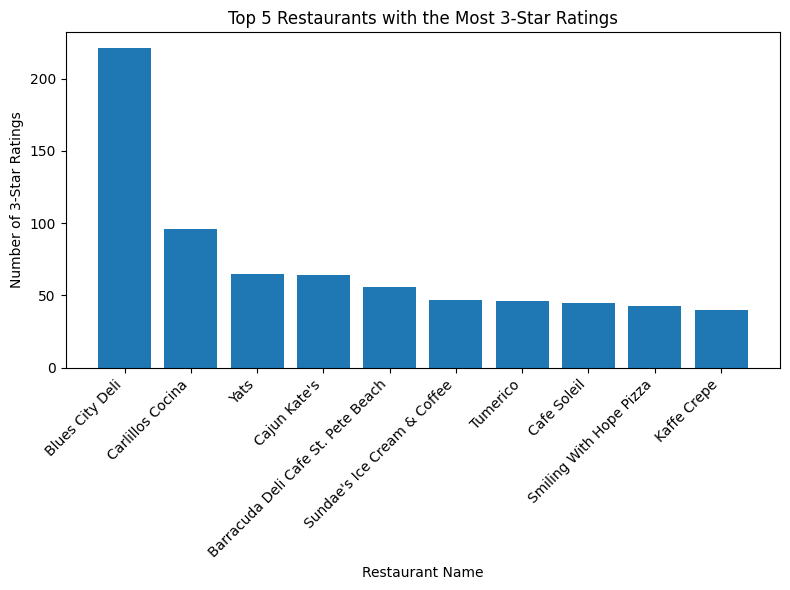

In [21]:
# Filter the DataFrame for restaurants with 3 stars
three_star_restaurants = restaurant_df[restaurant_df['stars'] == 5]

# Count the unique restaurant names with 5 stars
unique_three_star_names = three_star_restaurants['name'].nunique()
print(f"Total unique restaurant names with 3 stars: {unique_three_star_names}")

# Group by 'name' and count occurrences, then sort in descending order
top_three_star_restaurants = three_star_restaurants.groupby('name')['stars'].count().sort_values(ascending=False)

# Get the top 5 restaurants
top_5_restaurants = top_three_star_restaurants.head(10)

# Create a histogram of the top 5 restaurants
plt.figure(figsize=(8,6))
plt.bar(top_5_restaurants.index, top_5_restaurants.values)
plt.xlabel("Restaurant Name")
plt.ylabel("Number of 3-Star Ratings")
plt.title("Top 5 Restaurants with the Most 3-Star Ratings")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Total unique restaurant names with 2 stars: 1058


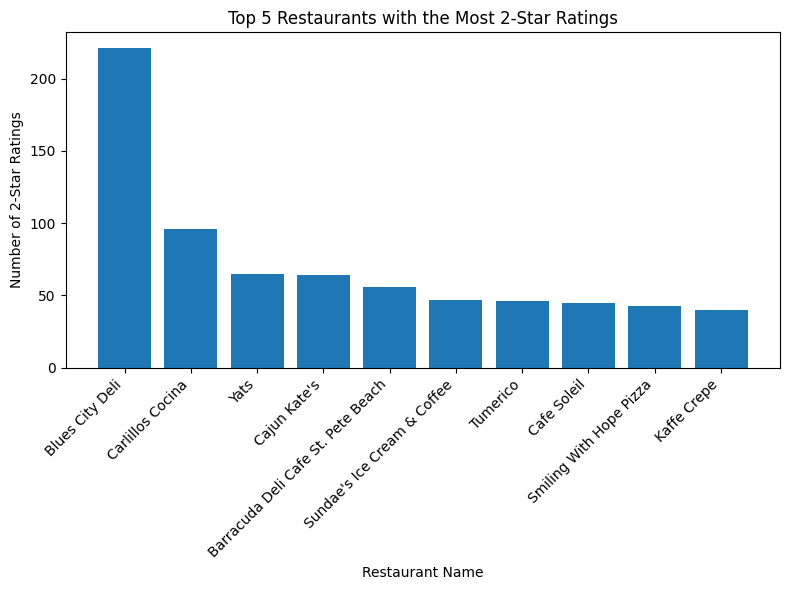

In [22]:
# Filter the DataFrame for restaurants with 2 stars
two_star_restaurants = restaurant_df[restaurant_df['stars'] == 5]

# Count the unique restaurant names with 5 stars
unique_two_star_names = two_star_restaurants['name'].nunique()
print(f"Total unique restaurant names with 2 stars: {unique_two_star_names}")

# Group by 'name' and count occurrences, then sort in descending order
top_two_star_restaurants = two_star_restaurants.groupby('name')['stars'].count().sort_values(ascending=False)

# Get the top 5 restaurants
top_5_restaurants = top_two_star_restaurants.head(10)

# Create a histogram of the top 5 restaurants
plt.figure(figsize=(8,6))
plt.bar(top_5_restaurants.index, top_5_restaurants.values)
plt.xlabel("Restaurant Name")
plt.ylabel("Number of 2-Star Ratings")
plt.title("Top 5 Restaurants with the Most 2-Star Ratings")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Total unique restaurant names with 1 stars: 1058


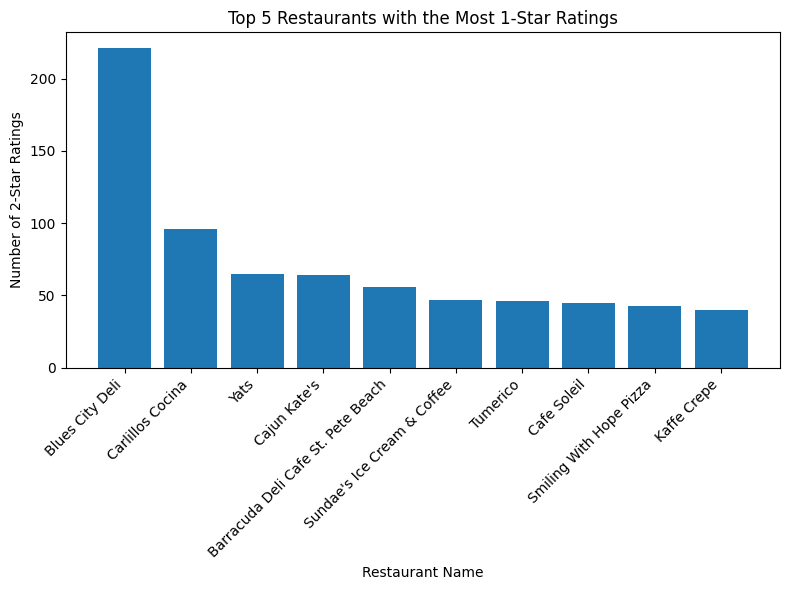

In [23]:
# Filter the DataFrame for restaurants with 1 stars
one_star_restaurants = restaurant_df[restaurant_df['stars'] == 5]

# Count the unique restaurant names with 5 stars
unique_one_star_names = one_star_restaurants['name'].nunique()
print(f"Total unique restaurant names with 1 stars: {unique_one_star_names}")

# Group by 'name' and count occurrences, then sort in descending order
top_one_star_restaurants = one_star_restaurants.groupby('name')['stars'].count().sort_values(ascending=False)

# Get the top 5 restaurants
top_5_restaurants = top_two_star_restaurants.head(10)

# Create a histogram of the top 5 restaurants
plt.figure(figsize=(8,6))
plt.bar(top_5_restaurants.index, top_5_restaurants.values)
plt.xlabel("Restaurant Name")
plt.ylabel("Number of 2-Star Ratings")
plt.title("Top 5 Restaurants with the Most 1-Star Ratings")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


no  of hotels per state
no of stars per state

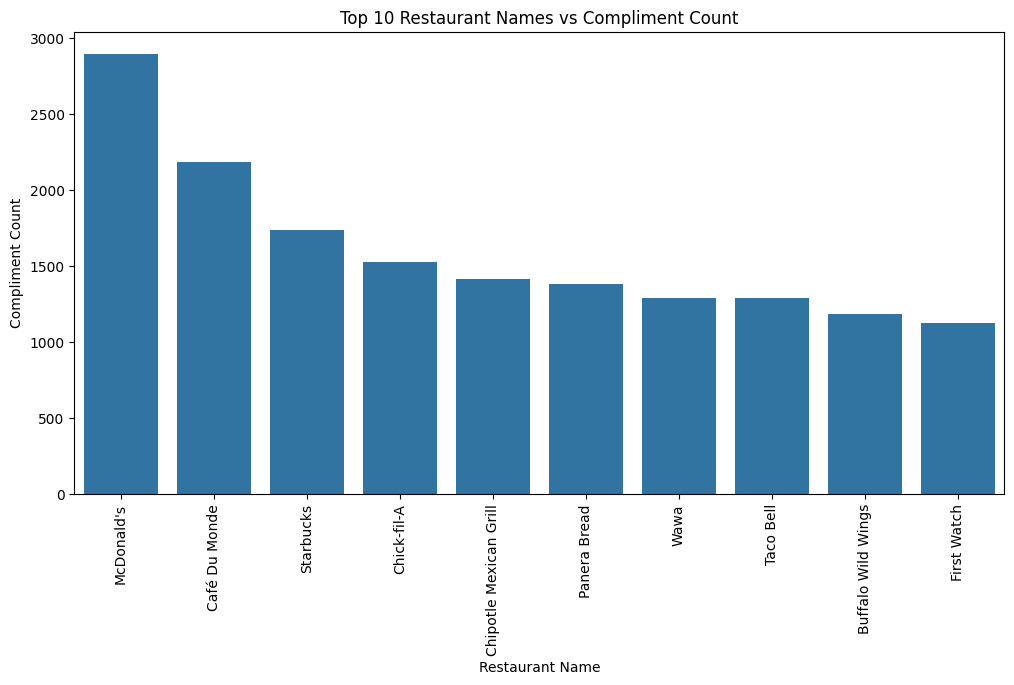

In [24]:
# plot  name vs compliment count top 10

# Group by 'name' and count the number of compliments
name_compliment_counts = restaurant_df.groupby('name')['compliment_count'].count()

# Sort the counts in descending order and take the top 10
top_10_names = name_compliment_counts.sort_values(ascending=False).head(10)

# Create a bar plot for the top 10 restaurants
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_names.index, y=top_10_names.values)
plt.xticks(rotation=90)
plt.xlabel('Restaurant Name')
plt.ylabel('Compliment Count')
plt.title('Top 10 Restaurant Names vs Compliment Count')
plt.show()

In [25]:
restaurant_df.columns

Index(['business_id', 'name', 'stars', 'review_count', 'attributes',
       'categories', 'hours', 'user_id', 'text', 'compliment_count',
       'Location'],
      dtype='object')

# **Feature Engineering**


categories standardize the spacing

# Collaborative filtering recommendation system


In [26]:
# Filter the data to focus on users with more than 10 reviews model 0
filtered_df = restaurant_df.groupby('user_id').filter(lambda x: len(x) > 10)

# Now create the user-item matrix with the filtered data
user_item_matrix = filtered_df.pivot_table(index='user_id', columns='name', values='stars', fill_value=0)
user_item_matrix.head(10)



name,#1 Mongolian BBQ - Best Stir Fried Noodles In Boise,&pizza - UPenn,&pizza - Walnut,&pizza - Willow Grove,'Merica Food Truck,'Ono Poke Co,'feine,026 Pub N Biergarten,1 In Town,10 Arts Bistro,...,the CAFÉ @ ARTpool Gallery,theory,up-RYES Bagel & Deli,vPho,yogurtree,zpizza,¡CUATRO,¡Juice!,ÀLAVITA,ā café
user_id,,,,,,,,,,,,,,,,,,,,,
--KsuCSkGGvDKTbdK9NvIg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
--_H9j6ggxvqhh9nPofZwg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
--u09WAjW741FdfkJXxNmg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-0H6Rm6dCi3pkFBC26HsoQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-1awBy86Qgr3aN30_Z3xGw,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-2U8X6XX1NV1mYX-2MCtKg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-2nNiAnDaSbQayynsqgL6Q,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-4RbxLJlFZlu-KRuUiiGLw,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-4mjLXqAoAtQjqDFo9q9WQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors

# Calculate cosine similarity between users
user_similarity = cosine_similarity(user_item_matrix)

# Create a DataFrame for user similarity
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)



In [28]:
def recommend_restaurants(user_id, user_item_matrix, user_similarity_df, top_n=5):
  """
  Recommends top N restaurants for a given user based on user similarity.

  Args:
    user_id: The ID of the user for whom to generate recommendations.
    user_item_matrix: The user-item interaction matrix.
    user_similarity_df: The DataFrame containing user similarity scores.
    top_n: The number of top recommendations to return.

  Returns:
    A list of recommended restaurant names.
  """
# Check if user_id is in the index of user_similarity_df
  if user_id not in user_similarity_df.index:
    print(f"User ID {user_id} not found in the similarity matrix. Returning empty recommendations.")
    return []  # Return an empty list if user ID is not found

  # Find similar users
  similar_users = user_similarity_df[user_id].sort_values(ascending=False)[1:]

  # Get restaurants the user has rated
  rated_restaurants = user_item_matrix.loc[user_id][user_item_matrix.loc[user_id] > 0].index.tolist()

  # Find restaurants liked by similar users but not yet rated by the target user
  recommended_restaurants = []
  for similar_user_id in similar_users.index:
    similar_user_ratings = user_item_matrix.loc[similar_user_id]
    for restaurant_name, rating in similar_user_ratings.items():
      if restaurant_name not in rated_restaurants and rating >= 4:  # Consider restaurants with high ratings
        recommended_restaurants.append((restaurant_name, rating))

  # Sort recommendations by rating (in descending order)
  recommended_restaurants.sort(key=lambda x: x[1], reverse=True)

  # Return the top N recommendations
  return [restaurant for restaurant, rating in recommended_restaurants[:top_n]]


# Get recommendations for user 'zx'
user_id_to_recommend = 'zxuxd6Hz2tKcpgZ71dYEcw'  # Replace with a valid user ID
recommendations = recommend_restaurants(user_id_to_recommend, user_item_matrix, user_similarity_df)
print(f"Top 5 recommended restaurants for user {user_id_to_recommend}: {recommendations}")


Top 5 recommended restaurants for user zxuxd6Hz2tKcpgZ71dYEcw: ['Paws The Cat Cafe', 'Sherwood Nitzza Deluxe Pizza Pasta & Donair', 'The Dosa Shop', 'Rio Vida Glutenfree Bakery & Manufacturing', 'Kobachi']


In [29]:
user_id_to_recommend = 'zz9wGVLClSDHoklHoj2g8w'  # Replace with a valid user ID
recommendations = recommend_restaurants(user_id_to_recommend, user_item_matrix, user_similarity_df)
print(f"Top 5 recommended restaurants for user {user_id_to_recommend}: {recommendations}")

Top 5 recommended restaurants for user zz9wGVLClSDHoklHoj2g8w: ["Sundae's Ice Cream & Coffee", "Joe's Next Door", "Sundae's Ice Cream & Coffee", 'El Mr Camaron', "Garcia's Hot Dog"]


In [30]:
# Get recommendations for user 'zu'
user_id_to_recommend = 'zu-e06_BM_TdkAZEKMrIww'  # Replace with a valid user ID
recommendations = recommend_restaurants(user_id_to_recommend, user_item_matrix, user_similarity_df)
print(f"Top 5 recommended restaurants for user {user_id_to_recommend}: {recommendations}")

Top 5 recommended restaurants for user zu-e06_BM_TdkAZEKMrIww: ['The Lucky Well - Spring Arts', "Miss Rachel's Pantry", 'Choice Beer Deli', 'Cafe Mi Quang', "Indiana Joe's"]


In [31]:
# prompt: accuracy score using cross evaluation

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier


# Assuming you have a 'user_item_matrix' and you want to use KNN for recommendation
# 1. Prepare your data:
# - X: User-item matrix (features)
# - y: Some target variable representing whether a user liked a restaurant or not (labels)

# Example: Consider restaurants with stars >= 4 as liked (you can adjust the threshold)
y = (user_item_matrix.mean(axis=1) >= 4).astype(int)
X = user_item_matrix.values


# 2. Choose a model (KNN in this example)
model = KNeighborsClassifier(n_neighbors=5)  # Adjust 'n_neighbors' as needed

# 3. Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# 4. Print the average accuracy and standard deviation
print(f"Accuracy: {cv_scores.mean():.2f} (+/- {cv_scores.std() * 2:.2f})")

# Note:
# We will need to adjust the model, features, or the target variable (y) to improve the accuracy.




Accuracy: 1.00 (+/- 0.00)


The model is over fitting, so we try another model 1 using SVD.

In [32]:
!pip install scikit-surprise
# Import necessary modules for model1
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split
from surprise.accuracy import rmse

# Load data into Surprise format
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(restaurant_df[['user_id', 'name', 'stars']], reader)
# Train-test split
trainset, testset = train_test_split(data, test_size=0.2)

# Initialize and train SVD model
svd_model = SVD()
svd_model.fit(trainset)

# Predict and evaluate using RMSE
predictions = svd_model.test(testset)
rmse(predictions)

RMSE: 0.2877


0.2876703188580438

In [33]:
 # Evaluate the model using accuracy score

from sklearn.metrics import accuracy_score

def evaluate_accuracy_surprise(predictions, threshold=4):
    """
    Evaluates the accuracy of predictions made by a Surprise model.

    Args:
        predictions: A list of Prediction objects from Surprise.
        threshold: The rating threshold for considering a prediction as a "like."

    Returns:
        The accuracy score.
    """
    y_true = [(pred.r_ui >= threshold) for pred in predictions]
    y_pred = [(pred.est >= threshold) for pred in predictions]
    accuracy = accuracy_score(y_true, y_pred)
    return accuracy

# Evaluate accuracy using the Surprise model's predictions
accuracy_surprise = evaluate_accuracy_surprise(predictions)
print(f"Accuracy (Surprise Model): {accuracy_surprise}")


Accuracy (Surprise Model): 0.6983594270486343


In [34]:
def get_user_recommendations(user_id, user_similarity_df, user_item_matrix, num_recommendations=5):
    """
    Gets recommendations for a user based on cosine similarity.

    Args:
        user_id: The ID of the user for whom to generate recommendations.
        user_similarity_df: DataFrame containing user-user similarity scores.
        user_item_matrix: DataFrame representing user-item ratings.
        num_recommendations: The number of recommendations to generate.

    Returns:
        A Series containing the top recommendations for the user.
    """
    # Check if user_id is in the index
    if user_id not in user_similarity_df.index:
        print(f"User ID '{user_id}' not found in the data.")
        return None  # or raise an exception if preferred

    # Get similar users
    similar_users = user_similarity_df.loc[user_id].sort_values(ascending=False)

    # Get the items rated by similar users
    similar_users_items = user_item_matrix.loc[similar_users.index]

    # Calculate the weighted scores for each item
    weighted_scores = similar_users_items.T.dot(similar_users)

    # Remove items the user has already rated
    weighted_scores = weighted_scores[user_item_matrix.loc[user_id, :].fillna(0) == 0]

    # Get the top recommendations
    return weighted_scores.nlargest(num_recommendations)

# Example: Get recommendations for a specific user ID
# Assuming 'U1001' is a valid user ID in your data
recommendations = get_user_recommendations('zz9wGVLClSDHoklHoj2g8w',user_similarity_df, user_item_matrix)
print("\nRecommendations for zz9wGVLClSDHoklHoj2g8w:")
print(recommendations)


Recommendations for zz9wGVLClSDHoklHoj2g8w:
name
Yats                      9.165334
Chick-fil-A               6.755137
Starbucks                 6.305220
Panera Bread              5.962112
Chipotle Mexican Grill    5.904378
dtype: float64


In [35]:
#Testing the model1
recommendations = get_user_recommendations('ztj0Iln1_ahMyDu9WXQNeA', user_similarity_df, user_item_matrix)
print("\nRecommendations for ztj0Iln1_ahMyDu9WXQNeA:")
print(recommendations)


Recommendations for ztj0Iln1_ahMyDu9WXQNeA:
name
Wawa                             1.177869
Zinburger Wine and Burger Bar    1.154852
Smashburger                      1.060200
Uno Pizzeria & Grill             0.893880
Marino's of Mullica Hill         0.886144
dtype: float64


# **Content based recommendation system**

In [36]:
def new_df(restaurant_df):
    """
    This function takes in a DataFrame, groups it by the business_id column,
    and combines all the text values for each business_id into one big text.
    The combined text is then assigned to a 'reviews' column.

    Parameters:
    restaurant_df: DataFrame containing restaurant reviews

    Returns:
    DataFrame with concatenated reviews
    """
    # Group by business_id and aggregate the 'text' column by joining all reviews
    grouped_df = restaurant_df.groupby('business_id').agg({
        'name': 'first',
        'address': 'first',
        'city': 'first',
        'state': 'first',
        'stars': 'first',
        'review_count': 'first',
        'attributes': 'first',
        'categories': 'first',
        'text': lambda x: ' '.join(x)  # Concatenate all reviews
    }).reset_index()

    # Rename 'text' column to 'reviews' for clarity
    grouped_df.rename(columns={'text': 'reviews'}, inplace=True)

    return grouped_df

# Call the function and create the new DataFrame
df = new_df(merged_df)
df.head()

,business_id,name,address,city,state,stars,review_count,attributes,categories,reviews
0,---kPU91CF4Lq2-WlRu9Lw,Frankie's Raw Bar,4903 State Rd 54,New Port Richey,FL,4.5,24,"{'Alcohol': 'u'none'', 'OutdoorSeating': 'True...","Seafood, Restaurants, Latin American, Food, Fo...",Awesome raw bar /fish shack. Exactly how I liv...
1,--0iUa4sNDFiZFrAdIWhZQ,Pupuseria Y Restaurant Melba,6 S White Horse Pike,Clementon,NJ,3.0,14,"{'Alcohol': 'u'none'', 'RestaurantsDelivery': ...","Food, Restaurants, Specialty Food, Mexican, Et...",No AC here but taking out. Fresh authentic and...
2,--30_8IhuyMHbSOcNWd6DQ,Action Karate,2235 York Rd,Jamison,PA,3.5,9,"{'GoodForKids': 'True', 'BusinessAcceptsCredit...","Trainers, Active Life, Fitness & Instruction, ...",Great place. Excellent for kids and adults.
3,--7PUidqRWpRSpXebiyxTg,Humpty's Family Restaurant,9910 108A Avenue,Edmonton,AB,2.0,12,"{'GoodForKids': 'True', 'RestaurantsAttire': '...","Breakfast & Brunch, Restaurants",Chunky hashbrowns :) first time to dine here b...
4,--8IbOsAAxjKRoYsBFL-PA,The Original Italian Pie,4706 Paris Ave,Gentilly,LA,3.0,27,"{'RestaurantsDelivery': 'True', 'RestaurantsRe...","Food, Restaurants, Italian",Welcome to the neighborhood! Super sweet staff...


We'll the create a new column called attributes_true by only extracting the true business attributes contained in the attributes column that has dictionary-like entries

In [37]:
# decompressing the attributes column into  new 'attributes_true' column
import ast

def decompress(x):
    """
    The function takes in a dictionary and returns only the keys that have their values not being False
    """
    list_ = []

    # Use ast.literal_eval for safer evaluation and handling Nonetype
    try:
        if isinstance(x, str):  # Check if x is a string before evaluating
            data_dict = ast.literal_eval(x)
        else:
            data_dict = {} # Handle Nonetype values
    except (SyntaxError, ValueError):
        data_dict = {}  # Handle invalid strings

    for key, val in data_dict.items():
        if (key in ['Ambience', 'GoodForMeal', 'BusinessParking']) and (val != "None"):
            for key_, val_ in eval(data_dict[key]).items():
                if val_:
                    list_.append(f'{key}_{key_}')
        else:
            if val != 'False':
                list_.append(key)

    return " ".join(list_)

In [38]:
import ast

# Function to safely decompress attributes
def decompress(x):
    """
    Safely decompress attributes by converting the string to a dictionary
    and returning a space-separated string of valid attribute keys.
    """
    list_ = []

    if isinstance(x, str):
        try:
            # Try to safely evaluate the string as a dictionary
            data_dict = ast.literal_eval(x)

            # Iterate through the dictionary
            for key, val in data_dict.items():
                if (key in ['Ambience', 'GoodForMeal', 'BusinessParking']) and (val != "None"):
                    # Handle sub-dictionaries
                    sub_dict = ast.literal_eval(val) if isinstance(val, str) else val
                    for key_, val_ in sub_dict.items():
                        if val_:
                            list_.append(f'{key}_{key_}')
                else:
                    if val != 'False' and val is not None:
                        list_.append(key)

        except (ValueError, SyntaxError):
            # Handle cases where x cannot be parsed
            print(f"Error parsing attribute: {x}")
            return ' '
    else:
        print(f"Attribute value is not a string: {x}")
        return ' '

    # Return space-separated string of valid attributes
    return " ".join(list_)

# Apply the function to the 'attributes' column to create the new 'attributes_true' column
df['attributes_true'] = df['attributes'].apply(lambda x: decompress(x) if x != 'Not-Available' else ' ')

# Display the top 5 rows for both 'attributes' and 'attributes_true'
print(df[['attributes', 'attributes_true']].head(5))


Streaming output truncated to the last 5000 lines.
Attribute value is not a string: {'WiFi': "u'no'", 'Smoking': "u'yes'", 'Alcohol': "u'full_bar'", 'HasTV': 'True', 'OutdoorSeating': 'False', 'BusinessAcceptsCreditCards': 'True', 'Music': "{'dj': False, 'background_music': False, 'no_music': False, 'jukebox': False, 'live': False, 'video': False, 'karaoke': False}", 'WheelchairAccessible': 'False', 'Ambience': "{'touristy': False, 'hipster': False, 'romantic': False, 'divey': False, 'intimate': False, 'trendy': False, 'upscale': False, 'classy': False, 'casual': False}", 'BusinessParking': "{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}"}
Attribute value is not a string: None
Attribute value is not a string: None
Attribute value is not a string: {'GoodForKids': 'True', 'RestaurantsReservations': 'False', 'RestaurantsGoodForGroups': 'True', 'BusinessAcceptsCreditCards': 'True', 'RestaurantsTakeOut': 'True', 'HasTV': 'True', 'RestaurantsAttire': "'ca

From the above output we can see that the function has only retrieved keys that have their values not egual to 'False'

We will then merge the attributes_true, categories, reviews columns into one large text for each unique business and assign to a new column details

In [39]:
# merging different columns to form one column of text
df['details']=df[['attributes_true','categories','reviews']].apply(lambda x: ''.join(str(i) for i in x if i is not None), axis=1)

# previewing the first row value in the new column
df.details[0]

' Seafood, Restaurants, Latin American, Food, Food TrucksAwesome raw bar /fish shack. Exactly how I live to eat. Excellent Great place! Excellent Food!'

After creating our desired column details , w'll then drop the columns that will not be useful onwards.


In [40]:
# dropping columns
df.drop(columns=['attributes_true','reviews'], inplace=True)

From the text example above we can see that the column text contains many symbols, punctuations and stopwords, next we shall remove the symbols and tokenize the column into a bag of words. These reasons serve to prepare text data for various text analysis and NLP tasks. It tokenizes the text, applies stemming, and standardizes the text for downstream processing, making it easier to analyze and extract meaningful information from the text.

In [41]:
!pip install nltk
import nltk
nltk.download('punkt')

# first create a pattern that strips all the non-word characters from words during tokenization
pattern =r"(?u)\b\w\w+\b"

# instantiate the tokenizer
from nltk.tokenize import RegexpTokenizer # importing RegexpTokenizer from nltk.tokenize
tokenizer = RegexpTokenizer(pattern)

# instantiating the stemmer
from nltk.stem.snowball import SnowballStemmer # importing SnowballStemmer from nltk.stem.snowball
stemmer = SnowballStemmer(language="english")

# creating a function to tokenize and stem words
def stem_and_tokenize(list_):
    tokens = tokenizer.tokenize(list_)
    return [stemmer.stem(token) for token in tokens]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


After instantiating the tokenizer and stemmer we then calculate the text frequency-inverse document frequency values using the TfidfVectorizer() method. Calculating TF-IDF values is a crucial step in preparing text data for analysis and transforming it into a format suitable for many NLP and text mining tasks. It helps convert unstructured text into structured numerical data that can be used for various analytical and machine learning purposes.

In [42]:
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords') # Download the stopwords dataset

# first create a pattern that strips all the non-word characters from words during tokenization
pattern =r"(?u)\b\w\w+\b"

# instantiate the tokenizer
from nltk.tokenize import RegexpTokenizer # importing RegexpTokenizer from nltk.tokenize
tokenizer = RegexpTokenizer(pattern)

# instantiating the stemmer
from nltk.stem.snowball import SnowballStemmer # importing SnowballStemmer from nltk.stem.snowball
stemmer = SnowballStemmer(language="english")

# creating a function to tokenize and stem words
def stem_and_tokenize(list_):
    tokens = tokenizer.tokenize(list_)
    return [stemmer.stem(token) for token in tokens]

# importing the stopwords from nltk.corpus
from nltk.corpus import stopwords

# instantiating the stop words
stopwords=stopwords.words('english')

# stemming the stopwords for uniformity while removing stopwords
stopwords=[ stemmer.stem(i) for i in stopwords]


from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer( max_features=200 ,
                        stop_words=stopwords,
                        tokenizer= stem_and_tokenize
#                         ngram_range=(1, 2),
#                         min_df=0,
                        )


# fitting and transforming the details column to extract the top 200 features
tfidf_matrix=tfidf.fit_transform(df['details'])

# previewing the tfidf matrix
import pandas as pd
pd.DataFrame.sparse.from_spmatrix(tfidf_matrix, columns=tfidf.get_feature_names_out()).head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,10,activ,also,alway,amaz,american,area,around,art,ask,...,well,wine,wing,wonder,work,worth,would,year,yum,yummi
0,0,0,0,0,0,0.251931,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0.198288,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.501244,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0.281451,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The code is configuring and using a TF-IDF vectorizer to convert text data into a numerical representation that captures word importance, while stemming stopwords for uniformity. The warning message is related to an unused parameter and does not affect the execution of the code.

In [43]:
from sklearn.metrics.pairwise import cosine_similarity # import the cosine_similarity function
from sklearn.feature_extraction.text import TfidfVectorizer # you may need this import if not already in your code

# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer()
text_data = df['details'].head(100).tolist()

# Create the TF-IDF matrix (each row represents a document, each column represents a word)
tfidf_matrix = vectorizer.fit_transform(text_data)

# Calculate the cosine similarity matrix
cosine_similarity_matrix = cosine_similarity(tfidf_matrix)

# Print the shape of the cosine similarity matrix
print("Cosine Similarity Matrix Shape: ", cosine_similarity_matrix.shape)

# Viewing the first column of the cosine similarity matrix
print("First column of Cosine Similarity Matrix:\n", cosine_similarity_matrix[:, 0])

Cosine Similarity Matrix Shape:  (100, 100)
First column of Cosine Similarity Matrix:
 [1.         0.14110485 0.09078411 0.00842662 0.13237094 0.
 0.01239356 0.         0.00641006 0.         0.06379045 0.0253572
 0.01970727 0.07827422 0.         0.         0.         0.01167857
 0.01866856 0.07652648 0.05048207 0.14514746 0.02052968 0.04271798
 0.03161223 0.02825682 0.01162644 0.05602394 0.06230957 0.10995116
 0.01770695 0.06289665 0.18811736 0.0927253  0.07691923 0.12113871
 0.15667188 0.0543161  0.00709772 0.07146954 0.01289993 0.00836493
 0.01371282 0.07450304 0.         0.03202117 0.02880498 0.02901374
 0.03503291 0.04879103 0.05865038 0.11512249 0.06636542 0.059148
 0.00811708 0.         0.         0.01515235 0.         0.
 0.03409517 0.01920666 0.15355207 0.         0.         0.1091026
 0.         0.00871341 0.04659499 0.00750105 0.10023662 0.01952564
 0.01296193 0.03421902 0.11205685 0.03443288 0.08004383 0.12096698
 0.         0.0273115  0.05554332 0.01487074 0.00841471 0.0785

The code is calculating the cosine similarity between the rows of the TF-IDF matrix (tfidf_matrix). The cosine similarity is a measure of similarity between two non-zero vectors in an inner product space, often used for text document similarity calculations. In this case, it's used to measure the similarity between the 'details' text descriptions of different businesses based on their TF-IDF scores.

We will then pickle our desired data and cosine matrix for deployment

In [44]:
import pickle
import os # Import the os module

# Create the 'data' directory if it doesn't exist
os.makedirs('./data', exist_ok=True)

# saving our data for deployment
pickle.dump(tfidf_matrix, open('./data/tfidf_matrix.pkl', 'wb'))
pickle.dump(cosine_similarity, open('./data/cosine_similarity.pkl', 'wb'))
pickle.dump(df, open('./data/data.pkl', 'wb'))
print("Files saved...")

Files saved...


In [45]:
with open('./data/cosine_similarity.pkl', 'rb') as file:
    cosine_similarity=pickle.load(file)

with open('./data/data.pkl', 'rb') as file:
    df=pickle.load(file)

**#Content-Based Model**

Using the cosine similarity matrix we will now create a content-based recommendation system that offers recommendations to users based on the restaurant names or text words representing the specifications of their desired restaurant and attributes.

We use the cosine similarity matrix to compare similarities between different restaurants and the customer's prefer

In [46]:
# creating a folium_map function that displays restaurant lovations

def folium_map(data):
    """
    The function takes in a dataframe and using the latitude and longitude columns displays a map showing the locations of
    all the restaurants available in the input data
    """
    # reseting the index in the input dataframe
    dff=data.reset_index(drop=True)


# Set up center latitude and longitude
    center_lat = dff['latitude'][0]
    center_long = dff['longitude'][0]

# Initialize map with center lat and long
    map_ =folium.Map([center_lat,center_long], zoom_start=7)

# Adjust this limit to see more or fewer businesses
    limit=dff.shape[0]
    print(f"{limit-1} Restaurant Locations")
    for index in range(limit-1):
        # Extract information about business
        lat = dff.loc[index,'latitude']
        long = dff.loc[index,'longitude']
        name = dff.loc[index,'name']
        rating = dff.loc[index,'b/s_rating']
        location = dff.loc[index,'location']
        details = "{}\nStars: {} {}".format(name,rating,location)
# Create popup with relevant details
        popup = folium.Popup(details,parse_html=True)

# Create marker with relevant lat/long and popup
        marker = folium.Marker(location=[lat,long], popup=popup)

        marker.add_to(map_)

    return display(map_)  # returning a map display

In [47]:
!pip install folium
import folium
import pandas as pd

def folium_map(data):
    """
    The function takes in a dataframe and using the latitude and longitude columns displays a map showing the locations of
    all the restaurants available in the input data
    """
    # reseting the index in the input dataframe
    dff = data.reset_index(drop=True)

    # Check if 'latitude' and 'longitude' columns exist
    if 'latitude' not in dff.columns or 'longitude' not in dff.columns:
        print("Error: 'latitude' and/or 'longitude' columns not found in the DataFrame.")
        return None  # Or handle the error in a way that suits your application

    # Set up center latitude and longitude
    center_lat = dff['latitude'][0]
    center_long = dff['longitude'][0]

    # Initialize map with center lat and long
    map_ = folium.Map([center_lat, center_long], zoom_start=7)

    # Adjust this limit to see more or fewer businesses
    limit = dff.shape[0]
    print(f"{limit - 1} Restaurant Locations")

    for index in range(limit - 1):
        # Extract information about business
        lat = dff.loc[index, 'latitude']
        long = dff.loc[index, 'longitude']
        name = dff.loc[index, 'name']  # Assuming 'name' column exists
        rating = dff.loc[index, 'b/s_rating']  # Assuming 'b/s_rating' column exists
        location = dff.loc[index, 'location']  # Assuming 'location' column exists
        details = "{}\nStars: {} {}".format(name, rating, location)

        # Create popup with relevant details
        popup = folium.Popup(details, parse_html=True)

        # Create marker with relevant lat/long and popup
        marker = folium.Marker(location=[lat, long], popup=popup)

        marker.add_to(map_)

    return display(map_)  # returning a map display

The content_based function uses content-based recommendation techniques to provide restaurant recommendations based on user input preferences, restaurant names, or user-defined text. The recommendations can be filtered by minimum rating and location and are visually presented on an interactive map if specified.

In [49]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

def content_based(df, name: str = None, stars: int = 1, num: int = 5, text: str = None, location: str = None):
    """
    The function takes the following input:

    df: DataFrame - a dataframe containing unique restaurants
    name: str - name of the restaurant to recommend similar restaurants
    num: int - number of restaurants to recommend
    location: str - preferred location of restaurants
    stars: int - preferred rating of restaurant
    text: str - user preferences in the form of text

    Based on the input parameters, the function offers similar restaurants to users.
    """

    # Vectorize the details column if using text for content-based recommendations
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(df['details'].tolist())  # TF-IDF matrix for 'details' column
    cosine_sim_matrix = cosine_similarity(tfidf_matrix)

    if name:
        # Find the index of the input restaurant name
        try:
            index_ = df.loc[df['name'] == name].index[0]
        except IndexError:
            print(f"Restaurant '{name}' not found in the dataset.")
            return None

        # Extract cosine similarity scores for the given restaurant
        sim_scores = list(enumerate(cosine_sim_matrix[index_]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:num+1]  # Sort by similarity score
        indices = [i[0] for i in sim_scores]  # Get indices of the top restaurants

        print(f"Top {num} Restaurants Similar to [{name}]:")

        # Filter by location and stars if provided
        if location:
            df_filtered = df[(df['stars'] >= stars) & (df['city'].str.contains(location, case=False))]
        else:
            df_filtered = df[df['stars'] >= stars]

        # Return recommended restaurants based on similarity
        recommendations = df_filtered.loc[indices, ['name', 'stars', 'review_count', 'city', 'address']].sort_values(
            'stars', ascending=False)
        return recommendations.reset_index(drop=True)

    # If no name is provided, use the other parameters to recommend restaurants
    else:
        # If text is provided, recommend based on text match
        if text:
            text = text.lower()
            tokens = stem_and_tokenize(text)  # Tokenize and stem input text
            tokens = [word for word in tokens if word not in stopwords]  # Remove stopwords
            text_set = set(tokens)

            if location:
                df_filtered = df[(df['city'].str.contains(location, case=False)) & (df['stars'] >= stars)]
            else:
                df_filtered = df[df['stars'] >= stars]

            vectors = []
            for details in df_filtered['details']:
                details_tokens = set(stem_and_tokenize(details.lower()))  # Tokenize and stem each restaurant's details
                common_tokens = text_set.intersection(details_tokens)  # Get common tokens
                vectors.append(len(common_tokens))

            # Sort by text relevance and return top restaurants
            vectors = sorted(list(enumerate(vectors)), key=lambda x: x[1], reverse=True)[:num]
            indices = [i[0] for i in vectors]
            print(f"Top {num} Restaurants Based on Entered Text:")
            recommendations = df_filtered.iloc[indices].sort_values(by=['stars', 'review_count'], ascending=False)
            return recommendations[['name', 'stars', 'review_count', 'city', 'address']].reset_index(drop=True)

        # If location is provided without text, recommend top restaurants in that location
        if location:
            df_filtered = df[df['city'].str.contains(location, case=False) & (df['stars'] >= stars)]
            recommendations = df_filtered.sort_values(by=['review_count', 'stars'], ascending=False).head(num)
            return recommendations[['name', 'stars', 'review_count', 'city', 'address']].reset_index(drop=True)

        # If no specific filters are provided, recommend the most popular restaurants based on review count and rating
        else:
            recommendations = df[df['stars'] >= stars].sort_values(by=['review_count', 'stars'], ascending=False).head(num)
            print("Most Popular Restaurants:")
            return recommendations[['name', 'stars', 'review_count', 'city', 'address']].reset_index(drop=True)


In [50]:
df_sample = df.sample(10)  # Use a sample of 10 rows for initial testing
content_based(df_sample)


Most Popular Restaurants:


,name,stars,review_count,city,address
0,Beijing Restaurant,3.5,188,Philadelphia,3714 Spruce St
1,Phu Khang,3.5,86,Pennsauken Township,"5201 Rt 38, Ste 117"
2,The Valley Project,4.0,75,Santa Barbara,116 E Yanonali St
3,Cecil Whittaker's Pizzeria,3.0,41,Saint Louis,12529 Olive Blvd
4,Dunkin',2.0,34,Tampa,330 W. Fletcher Ave
